In [32]:
import numpy
import pylab
import pandas
import matplotlib.pyplot as plt
import math
from pandas import Series

In [33]:
france_new_vaccinated = numpy.loadtxt(open("E:/France_Data/new_vaccinated.csv","rb"),delimiter=",",skiprows=0)
france_total_vaccinated = numpy.loadtxt(open("E:/France_Data/total_vaccinated.csv","rb"),delimiter=",",skiprows=0)
france_new_confirmed = numpy.loadtxt(open("E:/France_Data/new_cases.csv","rb"),delimiter=",",skiprows=0)
france_total_confirmed = numpy.loadtxt(open("E:/France_Data/total_cases.csv","rb"),delimiter=",",skiprows=0)

In [34]:
print(len(france_new_confirmed))
print(len(france_new_vaccinated))
print(len(france_total_confirmed))
print(len(france_total_vaccinated))

481
481
481
481


58638021.09999998

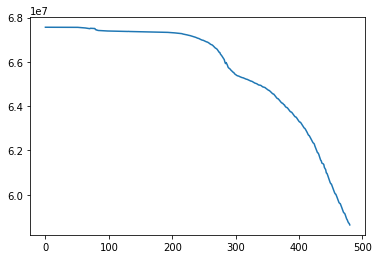

In [35]:
# 总人口
total_person = 67564251
# 疫苗作用率
# immune_rate = 0.4
# 传播率
# beta  = 0.02  
#恢复率
alpha = 0.1
# 每日新增
france_new_confirmed = list(france_new_confirmed)
# 总共确诊
france_total_confirmed = list(france_total_confirmed)
# 总共接种
france_total_vaccinated = list(france_total_vaccinated)
# 当日接种
france_new_vaccinated = list(france_new_vaccinated)

# 分别将total_confirmed ,new_confirmed,total_vaccinated 转化成int
new_confirmed = []
for i in france_new_confirmed:
    i = int(i)
    new_confirmed.append(i)
    
total_vaccinated = []
for i in france_total_vaccinated:
    i = int(i)
    total_vaccinated.append(i)
    
total_confirmed = []
for i in france_total_confirmed:
    i = int(i)
    total_confirmed.append(i)

new_vaccinated = []
for i in france_new_vaccinated:
    i = int(i)*alpha
    new_vaccinated.append(i)
# # 每日新增人数与疫苗人数之和
I_add_V = list(map(lambda x:(x[0]+x[1]),zip(new_confirmed,new_vaccinated))) 

Suspectible = []
for i in I_add_V:
    total_person = total_person - i
    Suspectible.append(total_person)
    
# # pylab.xlim(300,410)   
plot1 = pylab.plot(Suspectible, label='Suspectible')
Suspectible[-1]
# plot2 = pylab.plot(I_add_V)

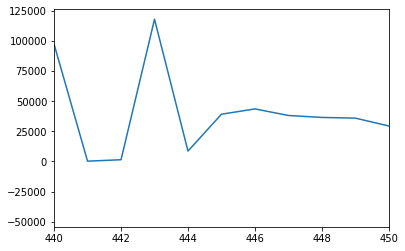

In [36]:
pylab.xlim(440,450)
plot1 = pylab.plot(new_confirmed)
# 在443达到顶峰

0.08394849075655557


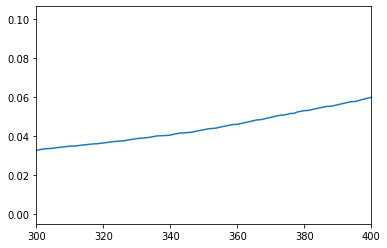

In [37]:
beta = list(map(lambda x:(x[0]/x[1]),zip(total_confirmed,Suspectible))) 
pylab.xlim(300,400) 
# UK_beta_pd= pandas.DataFrame(beta) 
# UK_beta_pd.to_csv('E:/uk_beta.csv',index=False,mode='a',header=None)
# print(len(beta))
# print(len(Suspectible))
print((beta[443]))
plot2 = pylab.plot(beta, label='beta') 

In [38]:
france_beta_pd= pandas.DataFrame(beta) 
france_beta_pd.to_csv('E:/France_Data/beta.csv',index=False,mode='a',header=None)

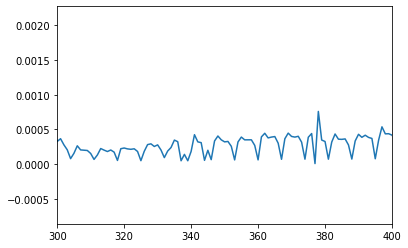

In [39]:
beta_series = pandas.Series(beta)
pylab.xlim(300,400)
pylab.plot(beta_series.diff(1))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


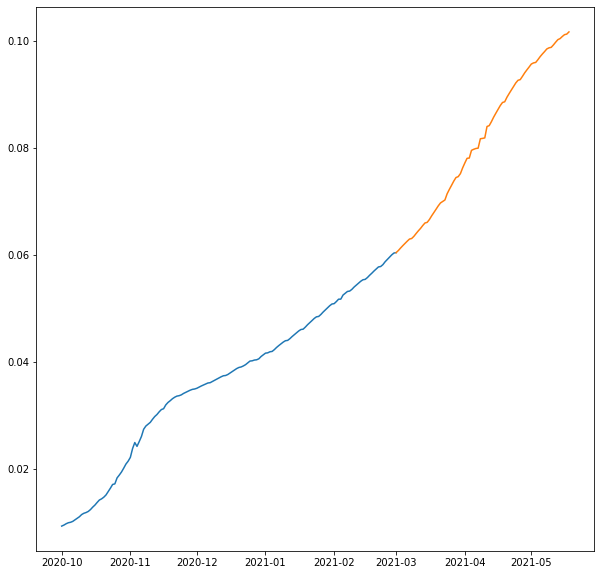

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
France_beta = pd.read_csv('E:/France_Data/beta.csv',index_col = 'Date',parse_dates=['Date'])
 
#ChinaBank.index = pd.to_datetime(ChinaBank.index)
sub = France_beta['2020/10':'2021/5']['Beta']
train = sub.ix['2020/10/1':'2021/3/1']
# print(type(train))
test = sub.ix['2021/3/1':'2021/5/20']
plt.figure(figsize=(10,10))
# print(train)
plt.plot(train)
plt.plot(test)
plt.show()

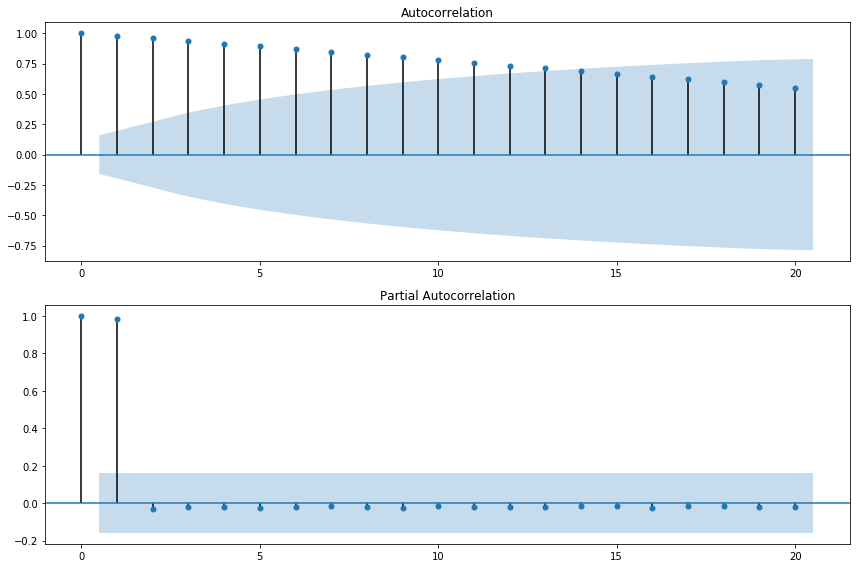

In [41]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarnin

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.

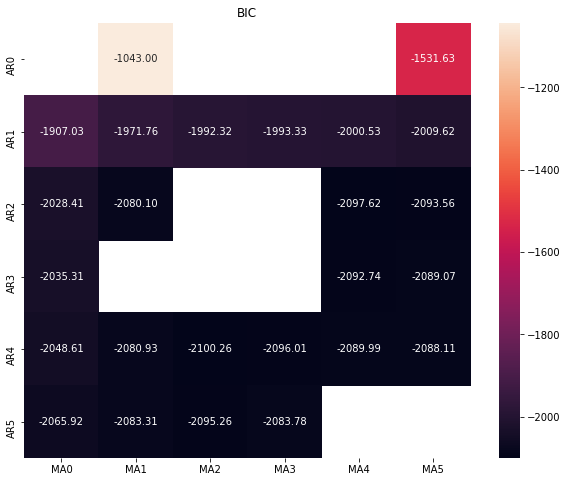

In [42]:
import itertools
import numpy as np
import seaborn as sns
 
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

In [43]:
train_results = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='nc', max_ar=8, max_ma=8)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: He

AIC (4, 8)
BIC (2, 1)


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<Figure size 864x576 with 0 Axes>

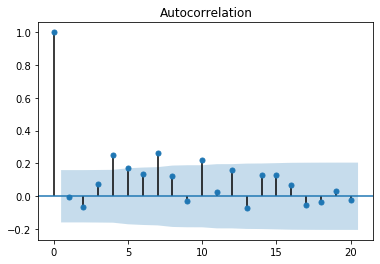

In [49]:
model = sm.tsa.ARIMA(train, order=(2, 1, 0))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20)
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2020-10-01    13.232189
2020-10-02     0.009246
2020-10-03     0.009585
2020-10-04     0.009883
2020-10-05     0.010023
2020-10-06     0.010025
2020-10-07     0.010265
2020-10-08     0.010645
2020-10-09     0.010889
2020-10-10     0.011253
2020-10-11     0.011725
2020-10-12     0.011835
2020-10-13     0.011893
2020-10-14     0.012153
2020-10-15     0.012617
2020-10-16     0.013151
2020-10-17     0.013490
2020-10-18     0.014058
2020-10-19     0.014485
2020-10-20     0.014511
2020-10-21     0.014897
2020-10-22     0.015402
2020-10-23     0.016190
2020-10-24     0.016870
2020-10-25     0.017593
2020-10-26     0.017217
2020-10-27     0.019158
2020-10-28     0.019211
2020-10-29     0.019827
2020-10-30     0.020658
                ...    
2021-04-19     0.088898
2021-04-20     0.088681
2021-04-21     0.090099
2021-04-22     0.090670
2021-04-23     0.091316
2021-04-24     0.091965
2021-04-25     0.092635
2021-04-26     0.092986
2021-04-27     0.092815
2021-04-28     0.093817
2021-04-29     0

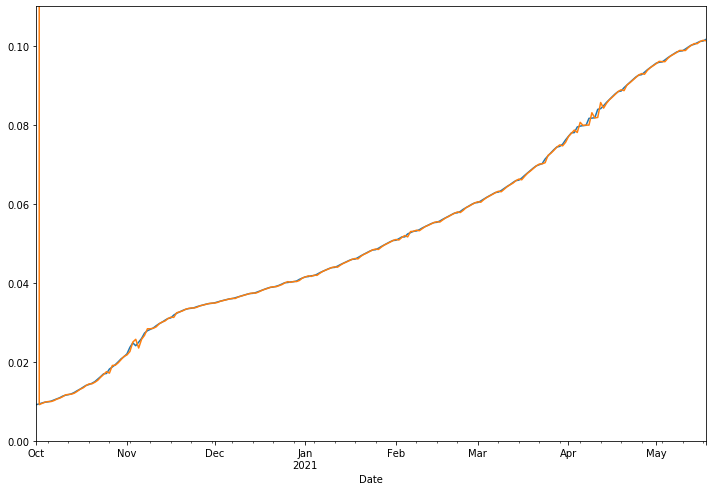

In [58]:
model = sm.tsa.ARIMA(sub, order=(2,0,0))
results = model.fit()
predict_sunspots = results.predict()
predict_beta = results.predict()
print(predict_beta)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sub.plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.ylim(0,0.11)
plt.show()

In [46]:
predict_beta_df = predict_beta.to_frame()
type(predict_beta_df)
# predict_beta_df.to_csv('E:/France_Data/beta_predict.csv',index=False,mode='a',header=None)

pandas.core.frame.DataFrame

In [48]:
total_cases_predict = list(map(lambda x:(x[0]*x[1]),zip(predict_beta,Suspectible)))
total_cases_predict = pandas.DataFrame(total_cases_predict)
total_cases_predict.to_csv('E:/France_Data/total_confirmed_predict.csv',index=False,mode='a',header=None)

In [30]:
new_cases_predict = list(Series(total_cases_predict).diff(1))

In [31]:
new_cases_predict[2:]

[12669.377526840311,
 16804.71488956292,
 12749.633982998901,
 5751.3290055335965,
 11538.284109624103,
 19344.25170629332,
 17770.939998387126,
 21547.453884994145,
 27277.712631424307,
 16306.29270807386,
 9428.995774382725,
 13951.746334278025,
 23564.787112025428,
 30509.111410650657,
 26301.812730300706,
 32971.34911706892,
 30671.665080392733,
 14698.465282212826,
 20970.723937813425,
 28242.73065260914,
 42077.57413317764,
 44219.91608646209,
 46788.23550333781,
 6843.987153135473,
 75616.47743305564,
 35770.940436023055,
 38995.916691684164,
 48468.35543440189,
 51519.01595346024,
 36566.374221699545,
 48208.39161755005,
 111008.95989373885,
 76171.95948840957,
 -48362.51711347094,
 60683.73071773234,
 64102.05964956945,
 91337.32103473647,
 40723.177243449725,
 22643.559461942874,
 23914.568895383505,
 38536.77446936234,
 34568.99787184573,
 25520.425956491847,
 33916.990447205724,
 28881.637815840077,
 10668.828129825648,
 48522.9306693268,
 30738.066314124037,
 22078.9741818

In [32]:
predict_cases_df =pandas.DataFrame(new_cases_predict)
# type(predict_beta_df)
predict_cases_df.to_csv('E:/France_Data/cases_predict.csv',index=False,mode='a',header=None)

In [3]:
France_SI = numpy.loadtxt(open("E:/France_Data/Strigency_index.csv","rb"),delimiter=",",skiprows=0)

In [5]:
population_denisty = 122.578
PSI = []
for i in France_SI:
    psi = population_denisty/i
    PSI.append(psi)

In [6]:
France_PSI = pandas.DataFrame(PSI)
France_PSI.to_csv('E:/France_Data/France_PSI.csv',index=False,mode='a',header=None)

In [13]:
AIR_PSI = list(map(lambda x:(x[0]/x[1]),zip(beta,PSI))) 

In [14]:
France_AIR_PSI = pandas.DataFrame(AIR_PSI)
France_AIR_PSI.to_csv('E:/France_Data/France_AIR_PSI.csv',index=False,mode='a',header=None)

In [15]:
AIR_PSI

[1.3426886024763414e-09,
 2.0140329335236636e-09,
 2.0140329335236636e-09,
 2.0140329335236636e-09,
 2.6853772844437544e-09,
 3.3567216552366154e-09,
 3.3567216552366154e-09,
 3.3567216552366154e-09,
 4.028066045902247e-09,
 4.028066045902247e-09,
 4.028066045902247e-09,
 4.028066045902247e-09,
 4.028066045902247e-09,
 4.028066045902247e-09,
 4.028066045902247e-09,
 7.384788297321994e-09,
 7.384788297321994e-09,
 7.384788297321994e-09,
 7.384788297321994e-09,
 7.384788297321994e-09,
 7.384788297321994e-09,
 7.384788297321994e-09,
 8.056132807224267e-09,
 8.056132807224267e-09,
 8.056132807224267e-09,
 8.056132807224267e-09,
 8.056132807224267e-09,
 8.056132807224267e-09,
 8.056132807224267e-09,
 8.056132807224267e-09,
 8.056132807224267e-09,
 8.056132807224267e-09,
 2.348015036070663e-08,
 3.0188766536743025e-08,
 6.373185933201891e-08,
 9.55978158814689e-08,
 4.192285602190645e-07,
 5.449973702758526e-07,
 1.0142857459999559e-06,
 1.1258044240123718e-06,
 1.5293964095792775e-06,
 2.26